## Module 6.1.4

In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longtitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Import citipy module
from citipy import citipy

In [4]:
# Add the latitudes and longtitudes to a list
coordinates = list(lat_lngs)
coordinates

[(-49.800354819326515, 173.25357464893273),
 (-82.83896757911141, -110.2777265683551),
 (7.741591598738225, 74.33064662435058),
 (-71.55040512299658, -78.97352893611621),
 (69.81330609678216, -131.14910638952418),
 (-63.65532938426611, -98.45834413644783),
 (40.68797715196564, 92.16099566726587),
 (-25.253107302524953, 34.6590644711554),
 (19.605854301885586, -88.20252871767306),
 (-50.28248342947384, 33.969967336661654),
 (21.334846753861683, 77.73049969620655),
 (-3.824888739548811, -0.9574833509368261),
 (67.75515331305533, 58.11235781282596),
 (86.34733047874636, 162.00012918011515),
 (-14.876218364693926, -9.17574194437745),
 (-41.823230154140674, -50.41353436035297),
 (-46.664080400948805, 25.974858692801234),
 (5.623254704272739, -46.89312459685374),
 (-0.9251206030963601, -2.4558952421680544),
 (-29.955813482155158, 1.0201555186221754),
 (55.71042453611125, 40.842234799129244),
 (-11.711134161017142, 101.92290193060052),
 (-62.12099214952826, 125.09594974479143),
 (34.057415767

In [5]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each lat and long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient number of cities in the list
len(cities)

615

In [6]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key


In [7]:
# Starting URL for weather Map API call
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c971f9fb98ac4976add5f0dfe44be1aa


In [8]:
# Create an endpoint URL for a city
city_url = url + "&q=" + "sitka"
print(city_url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c971f9fb98ac4976add5f0dfe44be1aa&q=sitka


## Module 6.2.6

In [9]:
# Import the time library and the datefime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginnof of the logging
print("Beginning Data Retrieval       ")
print ("------------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval       
------------------------------


In [11]:
# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    #Log the URL, record and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count +=1
    
    # Run an API request for each of the cities
    try:
        # Parse the json and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        # Convert the date to SIO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

    #Error check
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        pass
    
# Indicate loading is complete
print("-------------------------")
print("Data Retrieval Complete  ")
print("-------------------------")

Processing Record 1 of Set 1 | dunedin
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | dhidhdhoo
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | tuktoyaktuk
Processing Record 6 of Set 1 | hami
Processing Record 7 of Set 1 | manjacaze
Processing Record 8 of Set 1 | felipe carrillo puerto
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | chandur bazar
Processing Record 11 of Set 1 | takoradi
Processing Record 12 of Set 1 | usinsk
Processing Record 13 of Set 1 | cherskiy
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | mar del plata
Processing Record 16 of Set 1 | kruisfontein
Processing Record 17 of Set 1 | saint-georges
Processing Record 18 of Set 1 | axim
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | anopino
Processing Record 21 of Set 1 | labuhan
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 | torbay
Processing Record 24 of Set 1 | aksu
P

Processing Record 33 of Set 4 | kavieng
Processing Record 34 of Set 4 | manaure
Processing Record 35 of Set 4 | yulara
Processing Record 36 of Set 4 | northam
Processing Record 37 of Set 4 | kodiak
Processing Record 38 of Set 4 | deming
Processing Record 39 of Set 4 | alugan
Processing Record 40 of Set 4 | deputatskiy
Processing Record 41 of Set 4 | hobyo
Processing Record 42 of Set 4 | zharkovskiy
Processing Record 43 of Set 4 | samarai
Processing Record 44 of Set 4 | qaanaaq
Processing Record 45 of Set 4 | turukhansk
Processing Record 46 of Set 4 | juruti
Processing Record 47 of Set 4 | denpasar
Processing Record 48 of Set 4 | raudeberg
Processing Record 49 of Set 4 | naze
Processing Record 50 of Set 4 | hambantota
Processing Record 1 of Set 5 | zhigansk
Processing Record 2 of Set 5 | esmeraldas
Processing Record 3 of Set 5 | chokurdakh
Processing Record 4 of Set 5 | glenwood springs
Processing Record 5 of Set 5 | holme
Processing Record 6 of Set 5 | bolshaya orlovka
'coord'
City not

Processing Record 20 of Set 8 | rock sound
Processing Record 21 of Set 8 | itoman
Processing Record 22 of Set 8 | sept-iles
Processing Record 23 of Set 8 | yertarskiy
Processing Record 24 of Set 8 | poronaysk
Processing Record 25 of Set 8 | san fernando
Processing Record 26 of Set 8 | pasinler
Processing Record 27 of Set 8 | kostyantynivka
Processing Record 28 of Set 8 | salalah
Processing Record 29 of Set 8 | port lincoln
Processing Record 30 of Set 8 | jizan
Processing Record 31 of Set 8 | florianopolis
Processing Record 32 of Set 8 | dodge city
Processing Record 33 of Set 8 | moree
Processing Record 34 of Set 8 | okato
Processing Record 35 of Set 8 | makakilo city
Processing Record 36 of Set 8 | freeport
Processing Record 37 of Set 8 | filingue
Processing Record 38 of Set 8 | tommot
Processing Record 39 of Set 8 | tosno
Processing Record 40 of Set 8 | guerrero negro
Processing Record 41 of Set 8 | saldanha
Processing Record 42 of Set 8 | cikarang
Processing Record 43 of Set 8 | lake

Processing Record 9 of Set 12 | alenquer
Processing Record 10 of Set 12 | belyy yar
Processing Record 11 of Set 12 | lasa
Processing Record 12 of Set 12 | mitchell
Processing Record 13 of Set 12 | muros
Processing Record 14 of Set 12 | kazalinsk
'coord'
City not found. Skipping...
Processing Record 15 of Set 12 | nemuro
Processing Record 16 of Set 12 | arman
Processing Record 17 of Set 12 | loikaw
Processing Record 18 of Set 12 | zagare
Processing Record 19 of Set 12 | harper
Processing Record 20 of Set 12 | vanavara
Processing Record 21 of Set 12 | antofagasta
Processing Record 22 of Set 12 | bonavista
Processing Record 23 of Set 12 | ishinomaki
Processing Record 24 of Set 12 | fairbanks
Processing Record 25 of Set 12 | mentok
'coord'
City not found. Skipping...
Processing Record 26 of Set 12 | montagnana
Processing Record 27 of Set 12 | ruteng
Processing Record 28 of Set 12 | alakurtti
Processing Record 29 of Set 12 | piacabucu
Processing Record 30 of Set 12 | vikarabad
Processing Re

In [28]:
# Print the city count to confirm sufficient number of cities in the list
len(city_data)

568

In [29]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dunedin,-45.8742,170.5036,67.89,65,8,9.95,NZ,2023-01-16 02:43:52
1,Punta Arenas,-53.1500,-70.9167,51.91,71,0,18.41,CL,2023-01-16 02:47:21
2,Dhidhdhoo,6.8833,73.1000,79.34,69,92,6.85,MV,2023-01-16 02:48:29
3,Ushuaia,-54.8000,-68.3000,51.46,66,75,9.22,AR,2023-01-16 02:45:16
4,Tuktoyaktuk,69.4541,-133.0374,-14.80,76,100,6.91,CA,2023-01-16 02:48:30
5,Hami,42.8000,93.4500,13.78,33,99,1.45,CN,2023-01-16 02:48:30
6,Manjacaze,-24.7117,33.8828,77.47,76,96,6.53,MZ,2023-01-16 02:48:31
7,Felipe Carrillo Puerto,19.5833,-88.0500,62.04,83,27,3.06,MX,2023-01-16 02:48:31
8,Port Alfred,-33.5906,26.8910,70.18,89,99,15.90,ZA,2023-01-16 02:48:32
9,Chandur Bazar,21.2417,77.7456,64.24,40,0,4.74,IN,2023-01-16 02:48:32


In [30]:
# Reorder results of table to reade Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed
new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dunedin,NZ,2023-01-16 02:43:52,-45.8742,170.5036,67.89,65,8,9.95
1,Punta Arenas,CL,2023-01-16 02:47:21,-53.1500,-70.9167,51.91,71,0,18.41
2,Dhidhdhoo,MV,2023-01-16 02:48:29,6.8833,73.1000,79.34,69,92,6.85
3,Ushuaia,AR,2023-01-16 02:45:16,-54.8000,-68.3000,51.46,66,75,9.22
4,Tuktoyaktuk,CA,2023-01-16 02:48:30,69.4541,-133.0374,-14.80,76,100,6.91
5,Hami,CN,2023-01-16 02:48:30,42.8000,93.4500,13.78,33,99,1.45
6,Manjacaze,MZ,2023-01-16 02:48:31,-24.7117,33.8828,77.47,76,96,6.53
7,Felipe Carrillo Puerto,MX,2023-01-16 02:48:31,19.5833,-88.0500,62.04,83,27,3.06
8,Port Alfred,ZA,2023-01-16 02:48:32,-33.5906,26.8910,70.18,89,99,15.90
9,Chandur Bazar,IN,2023-01-16 02:48:32,21.2417,77.7456,64.24,40,0,4.74


In [31]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Module 6.3.1 Plotting Data for school project

In [32]:
# Extract relevant fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


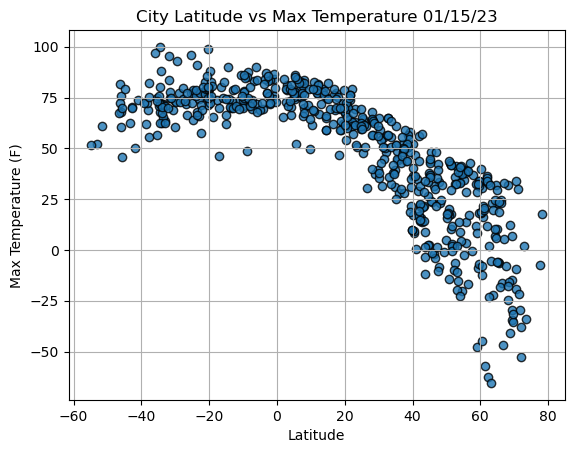

In [33]:
# Import the time module to set date and time
import time
# Build the scatter plot for latitude vs max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker = "o",
            alpha=0.8,
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature "+time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1_maxTemp.png")

# Show plot
plt.show()


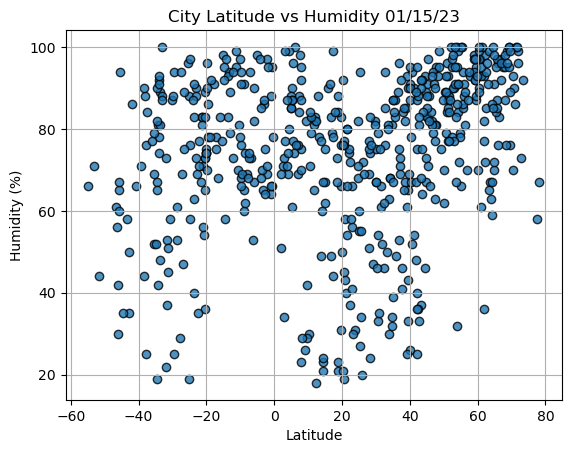

In [34]:
# Build the scatter plot for latitude vs Humidity
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker = "o",
            alpha=0.8,
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity "+time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2_humidity.png")

# Show plot
plt.show()

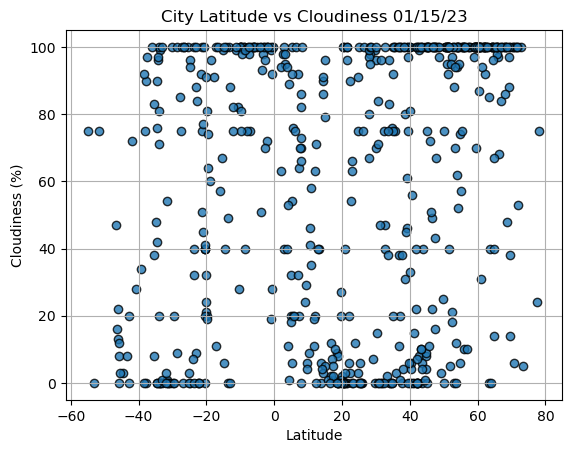

In [35]:
# Build the scatter plot for latitude vs Cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black",
            linewidths=1,
            marker = "o",
            alpha=0.8,
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness "+time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3_cloudiness.png")

# Show plot
plt.show()

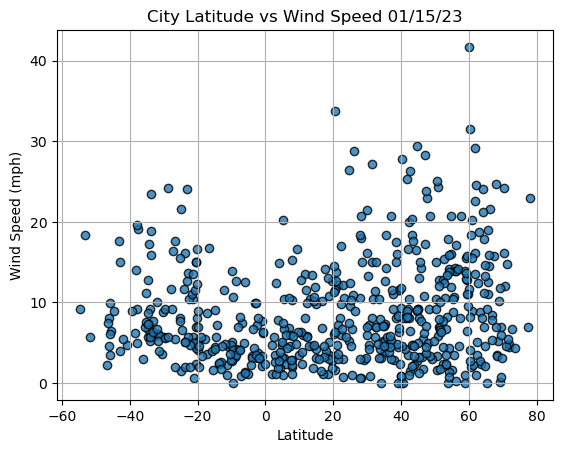

In [36]:
# Build the scatter plot for latitude vs Wind Speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black",
            linewidths=1,
            marker = "o",
            alpha=0.8,
            label = "Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed "+time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4_windSpeed.png")

# Show plot
plt.show()

## Add Linear Regression to the above Scatter Plots

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):


    # Run regression on hemisphere weather data - linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel('Temp')
    plt.show()

In [38]:
# Create a datafram from a datafram based on a single index
index13 = city_data_df.loc[13]
index13

City                    Jamestown
Country                        US
Date          2023-01-16 02:48:34
Lat                        42.097
Lng                      -79.2353
Max Temp                    22.01
Humidity                       75
Cloudiness                      0
Wind Speed                   3.44
Name: 13, dtype: object

In [39]:
# Create Norther and Souithern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dunedin,NZ,2023-01-16 02:43:52,-45.8742,170.5036,67.89,65,8,9.95
1,Punta Arenas,CL,2023-01-16 02:47:21,-53.1500,-70.9167,51.91,71,0,18.41
3,Ushuaia,AR,2023-01-16 02:45:16,-54.8000,-68.3000,51.46,66,75,9.22
6,Manjacaze,MZ,2023-01-16 02:48:31,-24.7117,33.8828,77.47,76,96,6.53
8,Port Alfred,ZA,2023-01-16 02:48:32,-33.5906,26.8910,70.18,89,99,15.90
...,...,...,...,...,...,...,...,...,...
549,Tsiroanomandidy,MG,2023-01-16 03:04:07,-18.7667,46.0333,65.55,92,96,3.31
553,Waitati,NZ,2023-01-16 03:04:10,-45.7500,170.5667,69.89,60,12,6.04
555,Espinosa,BR,2023-01-16 03:05:12,-14.9261,-42.8192,66.31,92,6,4.25
558,Mauriti,BR,2023-01-16 03:05:14,-7.3892,-38.7744,72.30,74,100,4.05


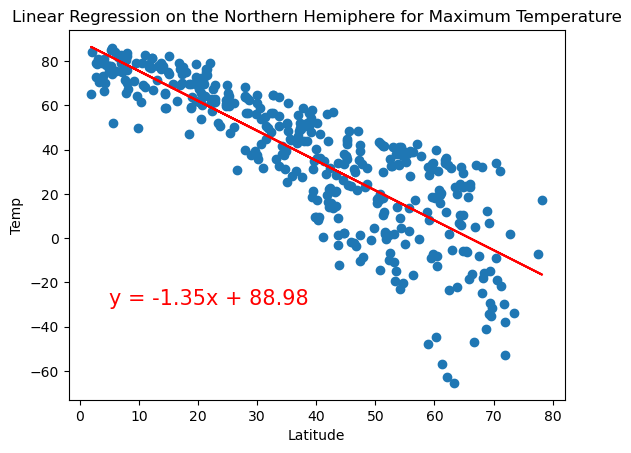

In [40]:
# Linear regresssion on the Northern hemiphere (requires cell 37) and Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemiphere for Maximum Temperature",
                       "Max Temp",(5,-30))

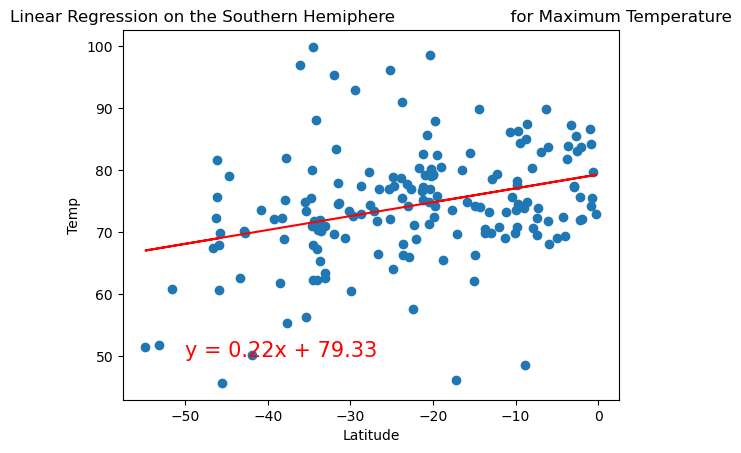

In [41]:
# Linear regresssion on the Southern hemiphere (requires cell 37) and Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemiphere\
                      for Maximum Temperature", "Max Temp",(-50,50))

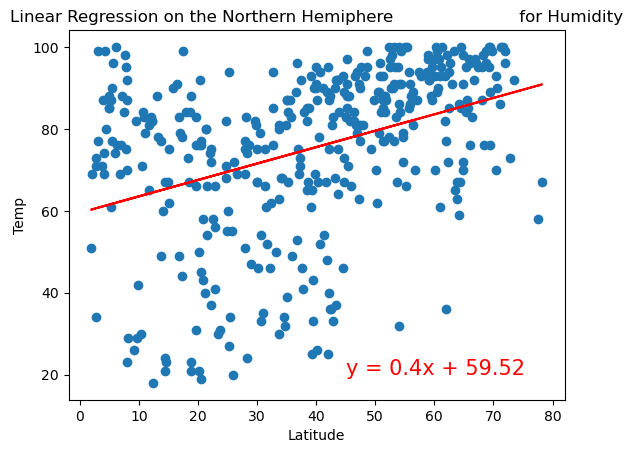

In [42]:
# Linear regresssion on the Northern hemiphere (requires cell 37) and Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemiphere\
                        for Humidity", "Humidity",(45,20))

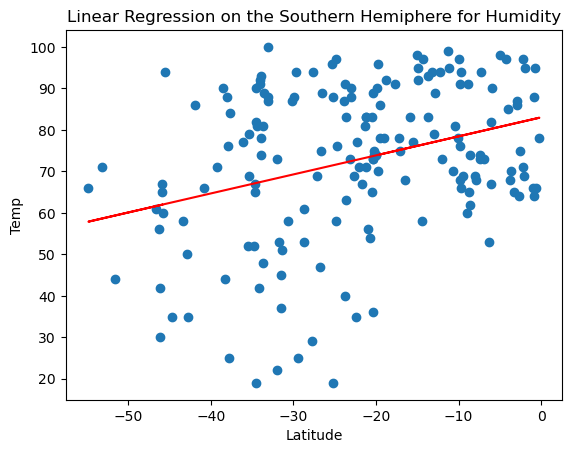

In [43]:
# Linear regresssion on the Southern hemiphere (requires cell 37) and Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemiphere for Humidity",
                       "Humidity",(45,20))

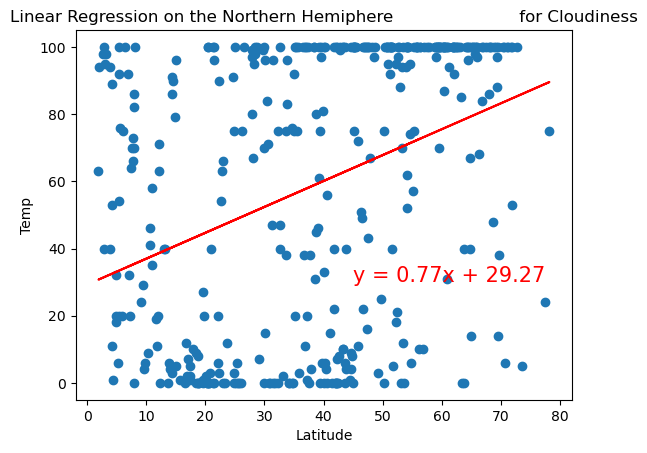

In [47]:
# Linear regresssion on the Northern hemiphere (requires cell 37) and Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemiphere\
                        for Cloudiness", "Cloudiness",(45,30))

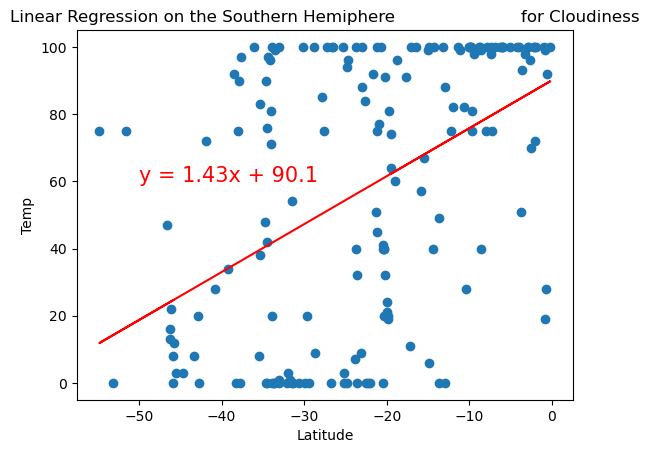

In [48]:
# Linear regresssion on the Southern hemiphere (requires cell 37) and Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemiphere\
                        for Cloudiness", "Cloudiness",(-50,60))

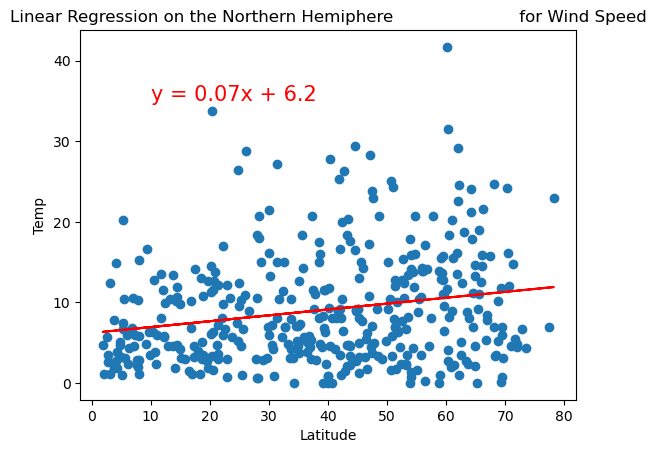

In [50]:
# Linear regresssion on the Northern hemiphere (requires cell 37) and Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Northern Hemiphere\
                        for Wind Speed", "Wind Speed",(10,35))

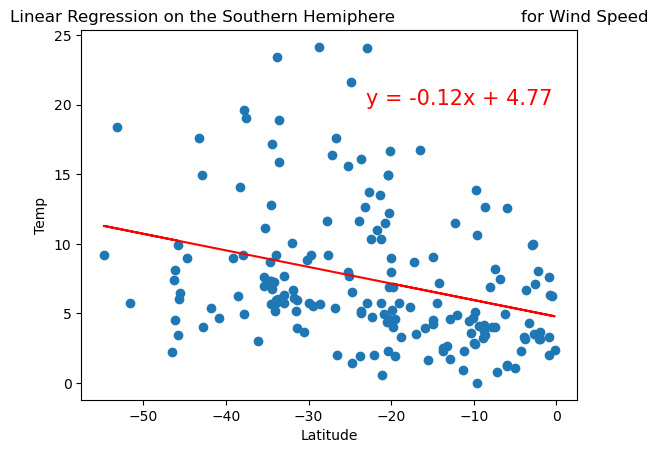

In [53]:
# Linear regresssion on the Southern hemiphere (requires cell 37) and Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on the Southern Hemiphere\
                        for Wind Speed", "Wind Speed",(-23,20))